# Twiter Exercise - Natural Language Sentiment Classification

In [11]:
import pandas as pd
import numpy as np
import string
import spacy
import random
from spacy.lang.pt.stop_words import STOP_WORDS
from spacy.training import Example
import re

In [3]:
data_train = pd.read_table('twitter_Train50.csv', sep=";")
data_train

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)
...,...,...,...,...,...
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(


In [4]:
np.unique(data_train['sentiment'], return_counts=True), np.unique(data_train['query_used'], return_counts=True)

((array([0, 1], dtype=int64), array([25000, 25000], dtype=int64)),
 (array([':(', ':)'], dtype=object), array([25000, 25000], dtype=int64)))

In [8]:
data_train.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [9]:
data_train

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
...,...,...
49995,:( é tão lindo que dói https://t.co/GqnpgyWWxB,0
49996,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",0
49997,eu te amo tanto minja vidinha meu bem mais pre...,0
49998,@itsLary @jessboluda Pfvor :(,0


In [10]:
data_train.isnull().sum()

tweet_text    0
sentiment     0
dtype: int64

# Cleaning data

In [5]:
punctuation = string.punctuation
stop_words = STOP_WORDS
nlp = spacy.load('pt_core_news_sm')

In [26]:
def preprocessing(text):
    text = text.lower()

    text = re.sub(r'@[A-Za-z0-9$-_@.&+]+','',text) #removing @ name

    text = re.sub(r'https?://[A-Za-z0-9./]+','',text) #removing url

    text = re.sub(r' +',' ',text) #removing empty spaces

    # Emoticons
    list_emotions = {':)': 'emocaopositiva',
                     ':d': 'emocaopositiva',
                     ':(': 'emocaonegativa'}
    for emotion in list_emotions:
        text = text.replace(emotion, list_emotions[emotion])

    document = nlp(text)
    
    list = []
    for token in document:
        list.append(token.lemma_)

    list = [word for word in list if word not in stop_words and word not in punctuation]
    list = ' '.join([str(element) for element in list if not element.isdigit()])
    return list

In [27]:
data_train['tweet_text2'] = data_train['tweet_text'].apply(preprocessing)

In [28]:
data_train

,tweet_text,sentiment,tweet_text2
0,@Laranjito76 A pessoa certa para isso seria o ...,1,pessoa certo vale azevedo emocaopositivo
1,"@behin_d_curtain Para mim, é precisamente o co...",1,precisamente contrário emocaopositiva vir ch...
2,Vou fazer um video hoje... estou pensando em f...,1,video hoje ... pensar falar meta de o csgo pag...
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1,Aaaaaaaa amei polaroids expressar to apaixonar...
4,Valoriza o coração do menininho que vc tem. El...,1,valorizar coração de o menininho vc diferente ...
...,...,...,...
49995,:( é tão lindo que dói https://t.co/GqnpgyWWxB,0,emocaonegativo lir dói
49996,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",0,.. problema c/ .. de o toc emocaonegativo em...
49997,eu te amo tanto minja vidinha meu bem mais pre...,0,amo minja vidinha precioso desculpa péssima ut...
49998,@itsLary @jessboluda Pfvor :(,0,pfvor emocaonegativo


In [29]:
data_train_final = []

for text, sentiment in zip(data_train['tweet_text2'], data_train['sentiment']):
    #print(text, emotion)

    if sentiment == 1:
        dict = ({'1': True, "0": False})
    else:
        dict = ({'1': False, "0": True})
    
    data_train_final.append([text,dict.copy()])

data_train_final

[['  pessoa certo vale azevedo emocaopositivo', {'1': True, '0': False}],
 ['  precisamente contrário emocaopositiva vir chuva vir disposição emocaopositivo',
  {'1': True, '0': False}],
 ['video hoje ... pensar falar meta de o csgo pagina alguer sugestao querer falar de o cenario nacional emocaopositivo',
  {'1': True, '0': False}],
 ['Aaaaaaaa amei polaroids expressar to apaixonar vdd ✨ 💖 🎈r 🎉 🎊 esperar outro pessoa consigar ganhar emocaopositivo',
  {'1': True, '0': False}],
 ['valorizar coração de o menininho vc diferente sorrir de isso ❤ ️ — valorizar mundo em o vida diferente emocaopositivo',
  {'1': True, '0': False}],
 ['  amiga to emocaopositivo', {'1': True, '0': False}],
 ['  bravo jairo emocaopositivo', {'1': True, '0': False}],
 ['  socorro ksoaksosks achar to em o caixinha som :p',
  {'1': True, '0': False}],
 ['  gostar fazenda emocaopositivo morro medo galinho kkkkkkk',
  {'1': True, '0': False}],
 ['amanha venom emocaopositivo', {'1': True, '0': False}],
 ['simplesment

In [32]:
data_train.head(10)

,tweet_text,sentiment,tweet_text2
0,@Laranjito76 A pessoa certa para isso seria o ...,1,pessoa certo vale azevedo emocaopositivo
1,"@behin_d_curtain Para mim, é precisamente o co...",1,precisamente contrário emocaopositiva vir ch...
2,Vou fazer um video hoje... estou pensando em f...,1,video hoje ... pensar falar meta de o csgo pag...
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1,Aaaaaaaa amei polaroids expressar to apaixonar...
4,Valoriza o coração do menininho que vc tem. El...,1,valorizar coração de o menininho vc diferente ...
5,@KingJokerLeto mas amiga eu to aqui ainda :),1,amiga to emocaopositivo
6,"@RivasJairo Bravo, Jairo!!! :)))",1,bravo jairo emocaopositivo
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1,socorro ksoaksosks achar to em o caixinha so...
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1,gostar fazenda emocaopositivo morro medo gal...
9,Amanha vou ver venom :D,1,amanha venom emocaopositivo


In [33]:
data_train_final[0:10]

[['  pessoa certo vale azevedo emocaopositivo', {'1': True, '0': False}],
 ['  precisamente contrário emocaopositiva vir chuva vir disposição emocaopositivo',
  {'1': True, '0': False}],
 ['video hoje ... pensar falar meta de o csgo pagina alguer sugestao querer falar de o cenario nacional emocaopositivo',
  {'1': True, '0': False}],
 ['Aaaaaaaa amei polaroids expressar to apaixonar vdd ✨ 💖 🎈r 🎉 🎊 esperar outro pessoa consigar ganhar emocaopositivo',
  {'1': True, '0': False}],
 ['valorizar coração de o menininho vc diferente sorrir de isso ❤ ️ — valorizar mundo em o vida diferente emocaopositivo',
  {'1': True, '0': False}],
 ['  amiga to emocaopositivo', {'1': True, '0': False}],
 ['  bravo jairo emocaopositivo', {'1': True, '0': False}],
 ['  socorro ksoaksosks achar to em o caixinha som :p',
  {'1': True, '0': False}],
 ['  gostar fazenda emocaopositivo morro medo galinho kkkkkkk',
  {'1': True, '0': False}],
 ['amanha venom emocaopositivo', {'1': True, '0': False}]]

In [34]:
data_train.tail(10)

,tweet_text,sentiment,tweet_text2
49990,queria uma sogra :( kk,0,querer sogra emocaonegativo kk
49991,Eu to tão triste de ficar essa semana toda sem...,0,to triste ficar semana amor emocaonegativo
49992,Acabei de ouvir no rádio :( https://t.co/rj0lk...,0,acabar ouvir em o rádio emocaonegativo
49993,Sdds dos tempos e da galera que não volta mais :(,0,sdds de o de o galera voltar emocaonegativo
49994,@luciannasouzafe kkkkkkkkkkkkkkkkkkkkkkkkkkk a...,0,kkkkkkkkkkkkkkkkkkkkkkkkkkk achonq alguém su...
49995,:( é tão lindo que dói https://t.co/GqnpgyWWxB,0,emocaonegativo lir dói
49996,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",0,.. problema c/ .. de o toc emocaonegativo em...
49997,eu te amo tanto minja vidinha meu bem mais pre...,0,amo minja vidinha precioso desculpa péssima ut...
49998,@itsLary @jessboluda Pfvor :(,0,pfvor emocaonegativo
49999,@Renk_lol Passa ano Entra ano Eu nao desisto d...,0,passar ano entrar ano nao desisto de o em o ...


In [35]:
data_train_final[49990:50000]

[['querer sogra emocaonegativo kk', {'1': False, '0': True}],
 ['to triste ficar semana amor emocaonegativo', {'1': False, '0': True}],
 ['acabar ouvir em o rádio emocaonegativo', {'1': False, '0': True}],
 ['sdds de o de o galera voltar emocaonegativo', {'1': False, '0': True}],
 ['  kkkkkkkkkkkkkkkkkkkkkkkkkkk achonq alguém superar aggrr aff enter perfeitamente pavor emocaonegativo',
  {'1': False, '0': True}],
 ['emocaonegativo lir dói', {'1': False, '0': True}],
 ['  .. problema c/ .. de o toc emocaonegativo em o entanto em o real preciso evitar q fixo ilimitar ano atrás&amp;do queixa .. em o combo amp;o fixo de o operadora .. tsc ..',
  {'1': False, '0': True}],
 ['amo minja vidinha precioso desculpa péssima utted amo palavra capaz explicar tamanho de o amor sintar ti emocaonegativo',
  {'1': False, '0': True}],
 ['  pfvor emocaonegativo', {'1': False, '0': True}],
 ['  passar ano entrar ano nao desisto de o em o emocaonegativa',
  {'1': False, '0': True}]]

In [36]:
len(data_train_final)

50000

# Model

In [37]:
model = spacy.blank('pt')
textcat = model.add_pipe('textcat')
textcat.add_label("1")
textcat.add_label("0")
#model.add_pipe('textcat')
history = []

In [41]:
model.begin_training()

for era in range(5):
    random.shuffle(data_train_final)
    losses = {}
    for batch in spacy.util.minibatch(data_train_final,512):
        texts = [model(text) for text, entities in batch]
        annotations = [{'cats': entities} for text, entities in batch]
        examples = [Example.from_dict(doc,annotation) for doc, annotation in zip(texts, annotations)]
        #print(examples)
        model.update(examples, losses=losses)
    
    if era % 5 ==0:
        print(losses)
        history.append(losses)

{'textcat': 1.8801410008018138}


In [42]:
history_loss = []
for i in history:
  history_loss.append(i.get('textcat'))

history_loss = np.array(history_loss)
history_loss

array([7.36406246, 1.880141  ])

Text(0, 0.5, 'Loss')

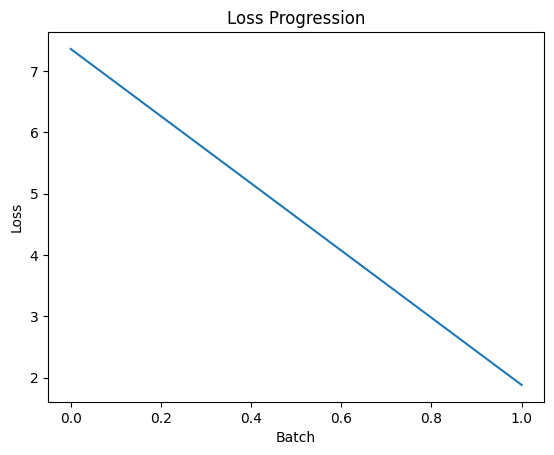

In [43]:
import matplotlib.pyplot as plt
plt.plot(history_loss)
plt.title('Loss Progression')
plt.xlabel('Batch')
plt.ylabel('Loss')

In [44]:
model.to_disk("model_twitter_sentiment_class")

# Testing model

In [53]:
model_load = spacy.load('model_twitter_sentiment_class')
model_load

In [47]:
test_data = pd.read_table('twitter_Test.csv', sep=";")
test_data

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)
...,...,...,...,...,...
4995,1030528364145201153,@ol_cdanilo parece livro de autoajuda :(,Fri Aug 17 18:54:42 +0000 2018,0,:(
4996,1030528418235015168,@tatazoquita aaaaa sinto muito :((,Fri Aug 17 18:54:55 +0000 2018,0,:(
4997,1030528446122930176,To começando a sentir dor de novo e meu irmão ...,Fri Aug 17 18:55:02 +0000 2018,0,:(
4998,1030528453752352769,@ichbintw parece que no dia que toma a vacina ...,Fri Aug 17 18:55:04 +0000 2018,0,:(


In [48]:
test_data.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [49]:
test_data['tweet_text2'] = test_data['tweet_text'].apply(preprocessing)

In [50]:
test_data

,tweet_text,sentiment,tweet_text2
0,@Gazo1a Nossa! Muito obrigada :),1,emocaopositivo
1,@BerzGamer vai pa puta que te pariu :),1,pa puta parir emocaopositiva
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 confiro em o...
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1,vcs ajudar galera por o amor butera emocaoposi...
4,Estávamos em casa do Zé e eu estava a morrer d...,1,casa de o zé morrer sono chegar casa fico sono...
...,...,...,...
4995,@ol_cdanilo parece livro de autoajuda :(,0,parecer livro autoajuda emocaonegativo
4996,@tatazoquita aaaaa sinto muito :((,0,aaaaar sinto emocaonegativo
4997,To começando a sentir dor de novo e meu irmão ...,0,to começar sentir dor irmão sumir remédio emoc...
4998,@ichbintw parece que no dia que toma a vacina ...,0,parecer em o dia tomar vacina n beber emocao...


In [54]:
predictions = []

for text in test_data['tweet_text2']:
    predict = model_load(text)
    predictions.append(predict.cats)

predictions

[{'1': 1.0, '0': 5.852318096799536e-08},
 {'1': 0.9999996423721313, '0': 3.161291886044637e-07},
 {'1': 0.9999998807907104, '0': 1.4439964957091433e-07},
 {'1': 0.9999978542327881, '0': 2.1174553239688976e-06},
 {'1': 0.9999997615814209, '0': 2.0341234119314322e-07},
 {'1': 1.0, '0': 2.8324476986085756e-08},
 {'1': 0.9999998807907104, '0': 6.319456957726288e-08},
 {'1': 0.9999998807907104, '0': 9.947002865828836e-08},
 {'1': 0.9999990463256836, '0': 9.938314633473055e-07},
 {'1': 0.9999998807907104, '0': 1.3568131862484734e-07},
 {'1': 0.9999998807907104, '0': 7.154944370313387e-08},
 {'1': 1.0, '0': 5.868436403488886e-08},
 {'1': 0.9999982118606567, '0': 1.781684773050074e-06},
 {'1': 1.0, '0': 4.25283452898384e-08},
 {'1': 0.9999998807907104, '0': 6.995882273486131e-08},
 {'1': 0.9999998807907104, '0': 1.5979530587628687e-07},
 {'1': 1.0, '0': 5.852318096799536e-08},
 {'1': 0.9999997615814209, '0': 1.8755974906525807e-07},
 {'1': 1.0, '0': 5.852318096799536e-08},
 {'1': 0.99999988079

In [55]:
final_predictions = []

for predict in predictions:
    if predict['1'] > predict['0']:
        final_predictions.append(1)
    else:
        final_predictions.append(0)

final_predictions = np.array(final_predictions)
final_predictions

array([1, 1, 1, ..., 0, 0, 0])

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [57]:
accuracy_score(test_data['sentiment'],final_predictions)

0.9976

In [58]:
confusion_matrix(test_data['sentiment'],final_predictions)

array([[2493,    7],
       [   5, 2495]], dtype=int64)